In [128]:
import matplotlib.pyplot as plt
import math
import numpy
import random

## Problem 2
### (a)

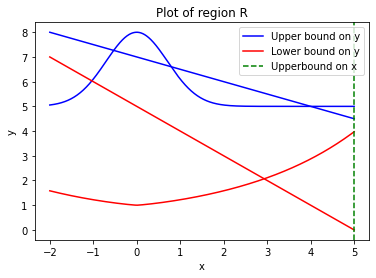

In [129]:
x = numpy.linspace(-2, 5, 700)

eq1 = 5 + numpy.multiply(numpy.exp(- numpy.square(x)), 3)
eq2 = 5 - x
eq3 = numpy.exp(numpy.multiply(numpy.power(numpy.absolute(x), 1.2), 0.2))
eq4 = 7 - numpy.divide(x, 2)

def plot_region_r():
    plt.plot(x, eq1, c = "blue", label = "Upper bound on y")
    plt.plot(x, eq2, c = "red", label = "Lower bound on y")
    plt.plot(x, eq3, c = "red")
    plt.plot(x, eq4, c = "blue")
    plt.axvline(x = 5, c = "green", ls = "--", label = "Upperbound on x")
    plt.title("Plot of region R")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

plot_region_r()

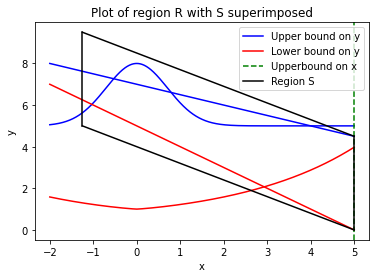

In [130]:
def plot_region_s():
    plot_region_r()

    plt.title("Plot of region R with S superimposed")
    s_x = numpy.linspace(-1.25, 5, 625)

    s_eq1 = numpy.multiply(s_x, -0.8) + 4
    s_eq2 = numpy.multiply(s_x, -0.8) + 8.5
    plt.plot(s_x, s_eq1, c = "black", label = "Region S")
    plt.plot(s_x, s_eq2, c = "black")
    plt.plot(numpy.repeat(-1.25, 450), numpy.linspace(5, 9.5, 450), c = "black")
    plt.plot(numpy.repeat(5, 450), numpy.linspace(0, 4.5, 450), c = "black")
    plt.legend()

plot_region_s()

For my region of S, I chose to craft a parallelogram.

## (b)

In [131]:
def is_in_region_r(x, y):
    '''
    Given an x, y coordinate, returns if is in region R
    '''
    if y > 5 + 3 * math.exp(- (x ** 2)):
        return False
    if y < 5 - x:
        return False
    if y < math.exp(0.2 * (abs(x) ** 1.2)):
        return False
    if y > 7 - x / 2:
        return False
    if x > 5:
        return False
    return True

s_area = 6.25 * 4.5

N = 1000
table = []
while True:
    num_in_r = 0
    for i in range(N):
        # Generate two uniform points and interpolate to obtain a point in our parallelogram
        a = random.uniform(0, 1)
        b = random.uniform(0, 1)
        a = a * 6.25 - 1.25
        b = (a * -0.8 + 4) + (b * 4.5)
        if is_in_region_r(a, b):
            num_in_r += 1

    theta_bar = num_in_r / N
    area_bar = s_area * theta_bar
    num_not_in_r = N - num_in_r
    var_bar = (num_in_r * ((s_area - area_bar) ** 2)) + (num_not_in_r * ((-area_bar) ** 2))
    var_bar /= (N - 1)
    var_area_bar = var_bar / N
    sd_area_bar = math.sqrt(var_area_bar)
    if theta_bar != 0:
        uncertainty_ratio = sd_area_bar / area_bar
    else:
        uncertainty_ratio = 1
    
    table.append([N, area_bar, sd_area_bar, uncertainty_ratio])
    if uncertainty_ratio < 0.01:
        break
    N += 1000

## (c)

In [132]:
# I round all decimals to 4 decimal places
print(f"N\tEstimated Area\tSt Dev of Estimated Area\tUncertainty Ratio")
for entry in table:
    print(f"{round(entry[0], 4)}\t{round(entry[1], 4)}\t\t{round(entry[2], 4)}\t\t\t\t{round(entry[3], 4)}")


N	Estimated Area	St Dev of Estimated Area	Uncertainty Ratio
1000	12.3469		0.4416				0.0358
2000	12.2484		0.3119				0.0255
3000	11.8125		0.2535				0.0215
4000	12.0867		0.2202				0.0182
5000	12.0431		0.1968				0.0163
6000	11.9719		0.1795				0.015
7000	11.8406		0.166				0.014
8000	11.7809		0.1551				0.0132
9000	11.6031		0.146				0.0126
10000	11.8828		0.1389				0.0117
11000	11.9301		0.1325				0.0111
12000	11.8477		0.1268				0.0107
13000	12.0418		0.1221				0.0101
14000	11.9471		0.1175				0.0098


## Problem 3
### (a)

In [133]:
def f(x, y, z):
    ret = - math.sqrt(abs(x)) - (abs(y) ** 2) * (1 + abs(x * y * z)) - math.sqrt(abs(x * y)) * (abs(z) ** 1.5)
    ret = math.exp(ret)
    return ret

area = 9 * 13 * 9
print("N\t\tf\t\tSt Dev of f\tIntegral\tSt Dev of Integral")
for i in range(1, 7):
    N = 10 ** i
    f_samples = []
    for j in range(N):
        x = random.uniform(-5, 4)
        y = random.uniform(-6, 7)
        z = random.uniform(-4, 5)
        f_sample = f(x, y, z)
        f_samples.append(f_sample)
    f_bar = sum(f_samples) / N
    integral_bar = f_bar * area
    
    var_bar = 0
    for sample in f_samples:
        var_bar += ((sample - f_bar) ** 2)
    var_bar /= (N - 1)
    sd_bar = math.sqrt(var_bar)

    var_f_bar = 0
    for sample in f_samples:
        var_f_bar += ((sample * area - integral_bar) ** 2)
    var_f_bar /= (N - 1)
    var_f_bar /= N
    sd_f_bar = math.sqrt(var_f_bar)    

    print("{}\t\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}".format(N, f_bar, sd_bar, integral_bar, sd_f_bar))


N		f		St Dev of f	Integral	St Dev of Integral
10		0.011451	0.018560	12.057639	6.180241
100		0.008134	0.034495	8.565130	3.632314
1000		0.010132	0.049057	10.669325	1.633542
10000		0.011318	0.054359	11.918185	0.572397
100000		0.010372	0.050986	10.921509	0.169777
1000000		0.010458	0.051004	11.012377	0.053707


For $N = 10^6$, by the Central Limit Theorem, the distribution of $\overline{I}$ should be a Gaussian distribution the 95% confidence interval is $\overline{I} \pm 2\sigma$ which by our table is $\approx (10.904963, 11.119791)$

### (b)

We construct $p(x, y, z) = g(x)h(y)k(z)$. I choose $g(x) = \begin{cases} \frac{1}{5} e^{-\frac{2}{5}x} & x \ge 0 \\ \frac{1}{5} e^{\frac{2}{5}x} & x < 0 \\ \end{cases}$ as an exponential distribution symmetric about the y-axis and $h(y) = \frac{1}{\sqrt{2 (\frac{1}{2})^2 \pi}} e^{-\frac{y^2}{2(\frac{1}{2})^2}}$ which is a Gaussian distribution with $\mu = 0, \sigma = \frac{1}{2}$. I further choose $k(z) = \begin{cases} \frac{1}{2}e^{-z} & z \ge 0 \\ \frac{1}{2}e^z & z < 0 \end{cases}$ for $z > 0$ as another exponential distribbution symmetric about the y-axis.

In [138]:
def symmetric_exponential(x, l):
    '''
    Returns PDF of symmetric exponential
    '''
    if x >= 0:
        return l / 2 * math.exp(-l * x)
    else:
        return l / 2 * math.exp(l * x)

def g(x, l):
    return symmetric_exponential(x, l)

def h(y, mu, sigma):
    '''
    Returns Gaussian PDF
    '''
    ret = math.exp(- ((y - mu) ** 2) / (2 * (sigma ** 2)))
    ret /= math.sqrt(2 * (sigma ** 2) * math.pi)
    return ret

def k(z, l):
    return symmetric_exponential(z, l)

def theta(x, y, z):
    '''
    Returns whether or not our coordinates are in the box of our integral
    '''
    if -5 <= x <= 4 and -6 <= y <= 7 and -4 <= z <= 5:
        return 1
    else:
        return 0

def sample_symmetric_exponential(l):
    r = random.uniform(0, 1)
    if r < 0.5:
        return math.log(2 * r) / l
    else:
        return math.log(2 * (1 - r)) / -l

def sample_g(l):
    return sample_symmetric_exponential(l)

def sample_h(mu, sigma):
    return numpy.random.normal(mu, sigma)

def sample_k(l):
    return sample_symmetric_exponential(l)

In [139]:
x_lambda = 0.4
y_mu = 0
y_sigma = 0.5
z_lambda = 1

print("N\t\tIntegral Estimate\tIntegral St Dev Estimate")
for i in range(1, 7):
    N = 10 ** i
    samples = []
    bad = 0

    for j in range(N):
        x = sample_g(x_lambda)
        y = sample_h(y_mu, y_sigma)
        z = sample_k(z_lambda)
        p = g(x, x_lambda) * h(y, y_mu, y_sigma) * k(z, z_lambda)
        sample = theta(x, y, z) * f(x, y, z) / p
        samples.append(sample)
    
    q_bar = sum(samples) / N
    var_q = 0
    for sample in samples:
        var_q += ((sample - q_bar) ** 2)
    var_q /= (N - 1)
    var_q_bar = var_q / N
    sigma_q_bar = math.sqrt(var_q_bar)
    print("{}\t\t{:.6f}\t\t{:.6f}".format(N, q_bar, sigma_q_bar))


N		Integral Estimate	Integral St Dev Estimate
10		11.975652		2.084657
100		11.296462		1.175114
1000		11.441447		0.504954
10000		10.874977		0.171795
100000		10.973067		0.058783
1000000		10.965308		0.019133


The 95% confidence interval for $I$ for $N = 10^6$ by the table above is $(10.927042, 11.003574)$

### (c)
My code has compatability to vary the parameters $(\lambda, \mu, \sigma)$ for the distributions of $x, y, z$. For simplicity's sake, in this section, I aim to lower the variance by adjusting the $\lambda$ for $z$. This means I keep parameters constant for the distributions of $x$ and $y$. I keep $N$ constant at $N = 10^6$

In [143]:
N = 10 ** 6

print("z lambda\tIntegral Estimate\tIntegral St Dev Estimate")
for i in range(1, 21):
    z_lambda = 0.1 * i
    samples = []
    bad = 0

    for j in range(N):
        x = sample_g(x_lambda)
        y = sample_h(y_mu, y_sigma)
        z = sample_k(z_lambda)
        p = g(x, x_lambda) * h(y, y_mu, y_sigma) * k(z, z_lambda)
        sample = theta(x, y, z) * f(x, y, z) / p
        samples.append(sample)
    
    q_bar = sum(samples) / N
    var_q = 0
    for sample in samples:
        var_q += ((sample - q_bar) ** 2)
    var_q /= (N - 1)
    var_q_bar = var_q / N
    sigma_q_bar = math.sqrt(var_q_bar)
    print("{:.1f}\t\t{:.6f}\t\t{:.6f}".format(z_lambda, q_bar, sigma_q_bar))

z lambda	Integral Estimate	Integral St Dev Estimate
0.1		10.935075		0.029545
0.2		10.951268		0.021715
0.3		10.917759		0.017402
0.4		10.919073		0.015168
0.5		10.944188		0.020740
0.6		10.941815		0.013990
0.7		10.971849		0.016315
0.8		10.920326		0.014917
0.9		10.932714		0.016313
1.0		10.921996		0.018179
1.1		10.928406		0.019627
1.2		10.907886		0.022505
1.3		10.919322		0.027774
1.4		10.899755		0.029144
1.5		10.984538		0.042839
1.6		10.919585		0.037805
1.7		11.013210		0.048420
1.8		10.897517		0.047118
1.9		10.930747		0.068704
2.0		11.048638		0.083214


For $\lambda_z$, I tried setting it to 20 different values between 0.1 and 2.0 because I initially set it to 1 in part (b). I then calculated the integral estimate and integral standard deviation estimate (square root of variance) and compared them. I can then see by the table that the optimal $\lambda_z = 0.6$ which helps decrease the standard deviation from $\lambda_z = 1.0$ by $\approx 0.004189$ which has a small but still noticeable difference. We can then make our 95% confidence interval with $N = 10^6$ for $I$ using $\lambda_z = 0.6$ as $(10.913835, 10.969795)$, which is narrower than in part (a) or (b).